<a href="https://colab.research.google.com/github/Salman-Fazal-7/Prediction-OF-Temperature-of-Two-Industries/blob/main/Decision_Tree_Temperature_of_two_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision** **Tree** **Regression**

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/annual_temp.csv')
dataset

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687
...,...,...,...
267,GISTEMP,1882,-0.1000
268,GCAG,1881,-0.0707
269,GISTEMP,1881,-0.1200
270,GCAG,1880,-0.1247


# **Separate** **the** **data** **into** **two** **datasets**,**one** **for** **each** **INDUSTRY**

# INDUSTRY1

In [3]:
Industry1 = dataset[dataset["Source"].str.contains("GCAG")]
Industry1

,Source,Year,Mean
0,GCAG,2015,0.8990
2,GCAG,2014,0.7402
4,GCAG,2013,0.6687
6,GCAG,2012,0.6219
8,GCAG,2011,0.5759
...,...,...,...
262,GCAG,1884,-0.2099
264,GCAG,1883,-0.1481
266,GCAG,1882,-0.0710
268,GCAG,1881,-0.0707


# INDUSTRY2

In [4]:
Industry2 = dataset[dataset["Source"].str.contains("GISTEMP")]
Industry2

,Source,Year,Mean
1,GISTEMP,2015,0.87
3,GISTEMP,2014,0.75
5,GISTEMP,2013,0.66
7,GISTEMP,2012,0.64
9,GISTEMP,2011,0.61
...,...,...,...
263,GISTEMP,1884,-0.28
265,GISTEMP,1883,-0.20
267,GISTEMP,1882,-0.10
269,GISTEMP,1881,-0.12


# Data Pre-processing

In [5]:
x1 = Industry1.iloc[:,1:2].values
y1 = Industry1.iloc[:,-1].values

In [ ]:
x1

array([[2015],
       [2014],
       [2013],
       [2012],
       [2011],
       [2010],
       [2009],
       [2008],
       [2007],
       [2006],
       [2005],
       [2004],
       [2003],
       [2002],
       [2001],
       [2000],
       [1999],
       [1998],
       [1997],
       [1996],
       [1995],
       [1994],
       [1993],
       [1992],
       [1991],
       [1990],
       [1989],
       [1988],
       [1987],
       [1986],
       [1985],
       [1984],
       [1983],
       [1982],
       [1981],
       [1980],
       [1979],
       [1978],
       [1977],
       [1976],
       [1975],
       [1974],
       [1973],
       [1972],
       [1971],
       [1970],
       [1969],
       [1968],
       [1967],
       [1966],
       [1965],
       [1964],
       [1963],
       [1962],
       [1961],
       [1960],
       [1959],
       [1958],
       [1957],
       [1956],
       [1955],
       [1954],
       [1953],
       [1952],
       [1951],
       [1950],
       [19

In [ ]:
y1

array([ 0.899 ,  0.7402,  0.6687,  0.6219,  0.5759,  0.7008,  0.6354,
        0.5415,  0.6113,  0.6139,  0.6583,  0.5806,  0.6145,  0.6018,
        0.5455,  0.4255,  0.4427,  0.6335,  0.5185,  0.3225,  0.4593,
        0.342 ,  0.2857,  0.2583,  0.4079,  0.435 ,  0.2982,  0.377 ,
        0.371 ,  0.2308,  0.1357,  0.151 ,  0.3429,  0.1836,  0.3024,
        0.2651,  0.2288,  0.1139,  0.1996, -0.0769,  0.006 , -0.0698,
        0.1654,  0.028 , -0.0775,  0.0383,  0.0937, -0.0282, -0.0112,
       -0.0204, -0.0752, -0.1461,  0.11  ,  0.0924,  0.0818,  0.0252,
        0.064 ,  0.1145,  0.0538, -0.1945, -0.1305, -0.1118,  0.0997,
        0.0288, -0.0095, -0.1579, -0.055 , -0.0471, -0.0455, -0.0013,
        0.1754,  0.2948,  0.1598,  0.1549,  0.1974,  0.0927, -0.0157,
       -0.0318, -0.0204, -0.1173, -0.1445, -0.1075, -0.2481, -0.1214,
       -0.0714, -0.1016, -0.2982, -0.1749, -0.1506, -0.0618, -0.1464,
       -0.251 , -0.2161, -0.2318, -0.1517, -0.2152, -0.2082, -0.2118,
       -0.3193, -0.2

In [6]:
x2 = Industry2.iloc[:,1:2].values
y2 = Industry2.iloc[:,-1].values

In [ ]:
x2

array([[2015],
       [2014],
       [2013],
       [2012],
       [2011],
       [2010],
       [2009],
       [2008],
       [2007],
       [2006],
       [2005],
       [2004],
       [2003],
       [2002],
       [2001],
       [2000],
       [1999],
       [1998],
       [1997],
       [1996],
       [1995],
       [1994],
       [1993],
       [1992],
       [1991],
       [1990],
       [1989],
       [1988],
       [1987],
       [1986],
       [1985],
       [1984],
       [1983],
       [1982],
       [1981],
       [1980],
       [1979],
       [1978],
       [1977],
       [1976],
       [1975],
       [1974],
       [1973],
       [1972],
       [1971],
       [1970],
       [1969],
       [1968],
       [1967],
       [1966],
       [1965],
       [1964],
       [1963],
       [1962],
       [1961],
       [1960],
       [1959],
       [1958],
       [1957],
       [1956],
       [1955],
       [1954],
       [1953],
       [1952],
       [1951],
       [1950],
       [19

In [ ]:
y2

array([ 0.87,  0.75,  0.66,  0.64,  0.61,  0.72,  0.65,  0.54,  0.66,
        0.63,  0.69,  0.55,  0.62,  0.63,  0.55,  0.42,  0.42,  0.64,
        0.48,  0.35,  0.46,  0.32,  0.24,  0.23,  0.43,  0.44,  0.29,
        0.41,  0.33,  0.19,  0.12,  0.16,  0.3 ,  0.13,  0.33,  0.27,
        0.17,  0.07,  0.18, -0.12, -0.02, -0.08,  0.15,  0.01, -0.09,
        0.02,  0.06, -0.07, -0.02, -0.05, -0.1 , -0.2 ,  0.06,  0.03,
        0.05, -0.03,  0.03,  0.07,  0.04, -0.2 , -0.15, -0.12,  0.08,
        0.01, -0.06, -0.18, -0.09, -0.09, -0.05, -0.04,  0.12,  0.25,
        0.13,  0.09,  0.13,  0.08, -0.03, -0.03, -0.03, -0.15, -0.19,
       -0.14, -0.29, -0.16, -0.09, -0.14, -0.35, -0.21, -0.2 , -0.09,
       -0.2 , -0.28, -0.24, -0.27, -0.21, -0.27, -0.22, -0.26, -0.4 ,
       -0.34, -0.11, -0.16, -0.34, -0.35, -0.45, -0.43, -0.48, -0.43,
       -0.4 , -0.23, -0.28, -0.45, -0.36, -0.28, -0.15, -0.09, -0.16,
       -0.28, -0.11, -0.15, -0.21, -0.3 , -0.3 , -0.26, -0.24, -0.36,
       -0.11, -0.2 ,

# **Training** **the** **Decision** **Tree** **Regression** **model** **on** **the** **whole** **dataset**

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state=2)
regressor1.fit(x1, y1)

DecisionTreeRegressor(random_state=2)

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state=2)
regressor2.fit(x2, y2)

DecisionTreeRegressor(random_state=2)

# Visualising the decision tree regression results(higher resulotion)

<ipython-input-9-60c92b068c1a>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x1), max(x1), 0.01)


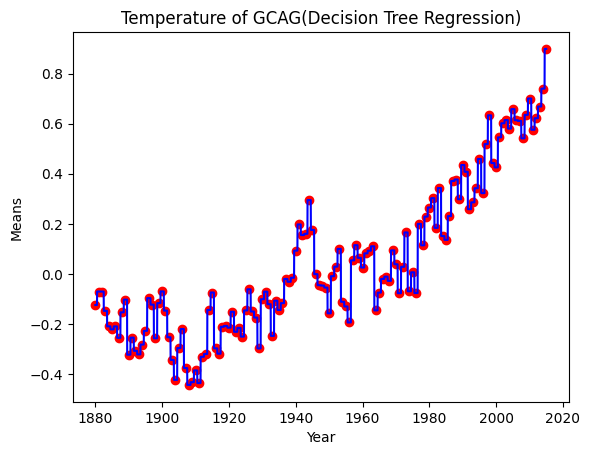

In [9]:
X_grid = np.arange(min(x1), max(x1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x1,y1,color = "red")
plt.plot(X_grid,regressor1.predict(X_grid),color = "blue")
plt.title("Temperature of GCAG(Decision Tree Regression)")
plt.xlabel("Year")
plt.ylabel("Means")
plt.show()

<ipython-input-10-e8e607f46b92>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x2), max(x2), 0.01)


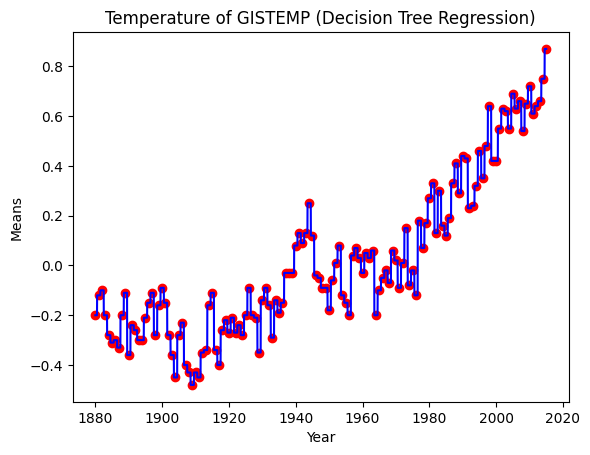

In [10]:
X_grid = np.arange(min(x2), max(x2), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x2,y2,color = "red")
plt.plot(X_grid,regressor2.predict(X_grid),color = "blue")
plt.title("Temperature of GISTEMP (Decision Tree Regression)")
plt.xlabel("Year")
plt.ylabel("Means")
plt.show()

# Predicting a new result

In [11]:
regressor1.predict([[2017]])

array([0.899])

In [12]:
regressor2.predict([[2017]])

array([0.87])